# Studi Kasus

DQLab *sport center* adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.

Di awal tahun 2019, manajer toko tersebut merekrut junior Data Analyst (DA) untuk membantu  memecahkan masalah yang ada di tokonya, yaitu __menurunnya pelanggan yang membeli kembali ke tokonya__.  Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa __*customer* termasuk sudah bukan disebut pelanggan lagi (*churn*)__ ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia. 

Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (*comma separated value*) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

## Import Library

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Data Preparation

In [21]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv')
print(df.head())

  no;Row_Num;Customer_ID;Product;First_Transaction;Last_Transaction;Average_Transaction_Amount;Count_Transaction
0  1;1;29531;Jaket;1466304274396;1538718482608;14...                                                            
1  2;2;29531;Sepatu;1406077331494;1545735761270;1...                                                            
2  3;3;141526;Tas;1493349147000;1548322802000;310...                                                            
3  4;4;141526;Jaket;1493362372547;1547643603911;7...                                                            
4  5;5;37545;Sepatu;1429178498531;1542891221530;1...                                                            


In [22]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')
print(df.head())

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  


In [23]:
print('Info dataset:')
print(df.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


### Data Cleansing

Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe *datetime*, maka dirubah kedua kolom tersebut ke tipe data *datetime*

In [24]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

### Churn Customers

Menentukan *Churn customers* pada data transaksi tersebut dengan mencari :

1. Transaksi terakhir yang dilakukan pada data transaksi

In [25]:
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000013


2. Melakukan klasifikasi *customer* yang berstatus *churn* atau tidak dengan *boolean* sesuai studi kasus diatas

In [26]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    Fal

### Menghapus kolom yang tidak diperlukan dalam analisis data

In [27]:
del df['no']
del df['Row_Num']

print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


## Data Visualization

Membuat visualisasi data berupa *trend of customer acquisition by year* dengan menggunakan *bar chart*. Namun, sebelumnya membuat fitur/kolom tambahan yang merupakan data tahun dari First_Transaction dan data tahun dari Last_Transaction

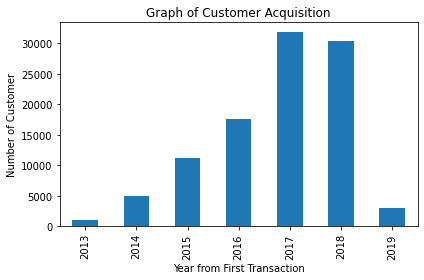

In [60]:
#Fitur tambahan
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year from First Transaction')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

Membuat visualisasi data berupa *trend* jumlah transaksi per tahunnya dengan menggunakan *bar chart*

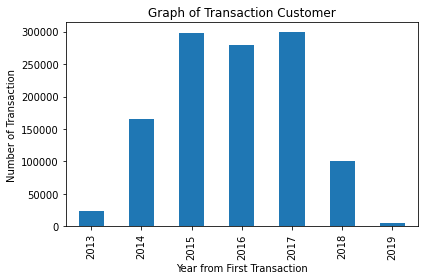

In [61]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year from First Transaction')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

Membuat visualisasi *trend* dari tahun ke tahun, rata-rata jumlah transaksi untuk setiap produknya.

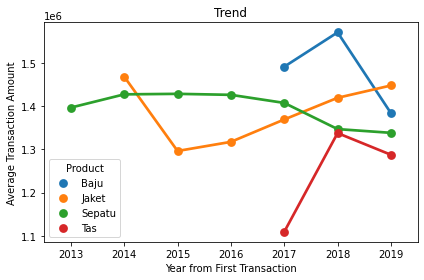

In [71]:
plt.clf()
ax = sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
ax.set(title='Trend',xlabel='Year from First Transaction', ylabel='Average Transaction Amount')
plt.tight_layout()
plt.show()

Mem-visualisasikan besar proporsi *churned customer* untuk tiap-tiap produk sehingga didapatkan *insight* dengan menggunakan *piechart*

<Figure size 432x288 with 0 Axes>

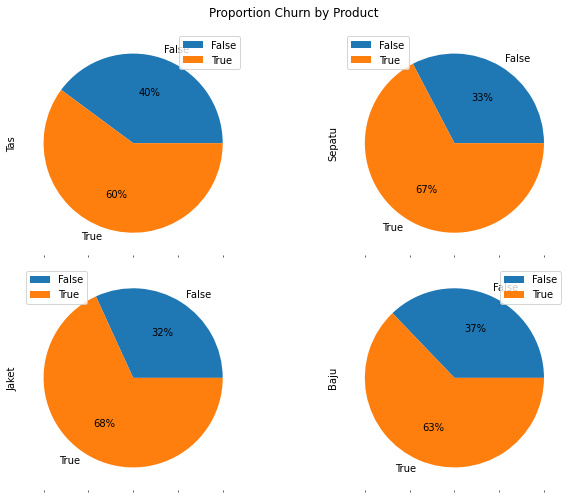

In [31]:
plt.clf()

# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Melakukan visualisasi menggunakan *bar chart* dari distribusi kategorisasi *count transaction* seperti pada tabel :   

    -------------------------------------------  
      Rentang jumlah transaksi       Kategori
    ----------------------------   ------------
                s/d 1	             1. 1
                2 s/d 3	           2. 2 - 3
                4 s/d 6	           3. 4 - 6
                7 s/d 10	          4. 7 - 10
                > 10	              5. > 10

<Figure size 432x288 with 0 Axes>

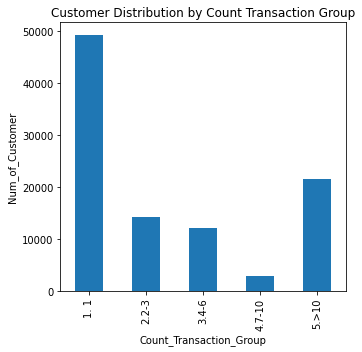

In [47]:
plt.clf()

# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val

# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
plt.figure(figsize=(5,5))
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Melakukan visualisasi dengan menggunakan *bar chart* dari distribusi kategorisasi *average transaction amount* seperti pada tabel berikut :

    -----------------------------------------------------------------
      Rentang rata-rata besar transaksi              Kategori
    -------------------------------------   -------------------------
            100.000 s/d 200.000	           1. 100.000 - 250.000
            >250.000 s/d 500.000	          2. >250.000 - 500.000
            >500.000 s/d 750.000	          3. >500.000 - 750.000
            >750.000 s/d 1.000.000	        4. >750.000 - 1.000.000
            >1.000.000 s/d 2.500.000	      5. >1.000.000 - 2.500.000
            >2.500.000 s/d 5.000.000	      6. >2.500.000 - 5.000.000
            >5.000.000 s/d 10.000.000	     7. >5.000.000 - 10.000.000
            >10.000.000	                   8. >10.000.000

<Figure size 432x288 with 0 Axes>

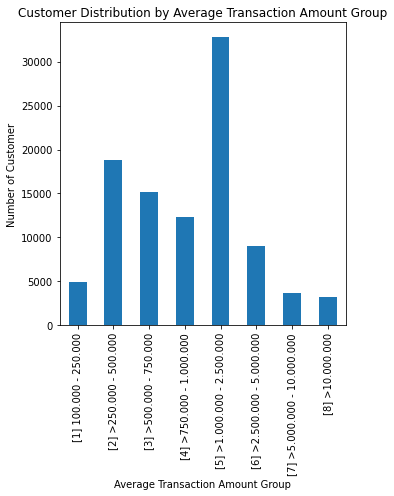

In [74]:
plt.clf()

# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='[1] 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='[2] >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='[3] >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='[4] >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='[5] >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='[6] >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='[7] >5.000.000 - 10.000.000'
    else:
        val ='[8] >10.000.000'
    return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
plt.figure(figsize=(5,7))
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

## Modelling

Menentukan feature columns dari dataset yang dimiliki dan menambahkan kolom terakhir (Year_Diff) sebagai variabel independent X. Serta variabel dependant y untuk menentukan kondisi *churn customers* atau tidak

In [44]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
x = df[feature_columns]

# Target variable
y = df['is_churn'] 

#Change data type
y = y.astype('int')

In [57]:
print("\nMengecek distribusi label menggunakan fungsi groupby() dan size()")
print(df.groupby('is_churn').size())


Mengecek distribusi label menggunakan fungsi groupby() dan size()
is_churn
False    33431
True     66569
dtype: int64


Split data menjadi *training* dan *testing*

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

*Training* model dengan __*Logistic Regression*__

In [53]:
# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train, y_train)

# Predict model
y_pred = logreg.predict(x_test)

#Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

Evaluasi Model Performance:
Training Accuracy : 0.6652533333333334
Testing Accuracy : 0.66668


Evaluasi model dengan menggunakan *confusion matrix*

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

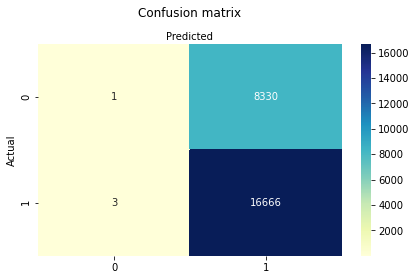

In [51]:
plt.clf()

# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [69]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
